<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: pandas and matplotlib practice with IMDb Data

---

For this unit project, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with `pandas`.

The notebook is split into basic, intermediate, and advanced sections.

## Basic level

In [2]:
#not massively efficient use of memory to move all of this into the name space, but i prefer to declare 
#dependencies explicitly and do so up here at the top assuming someone else will need to read or use my code one day

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
#breaking the df up into index, columns and data to get a better initial understanding of it's content and values
movies.info

<bound method DataFrame.info of      star_rating                                              title  \
0            9.3                           The Shawshank Redemption   
1            9.2                                      The Godfather   
2            9.1                             The Godfather: Part II   
3            9.0                                    The Dark Knight   
4            8.9                                       Pulp Fiction   
5            8.9                                       12 Angry Men   
6            8.9                     The Good, the Bad and the Ugly   
7            8.9      The Lord of the Rings: The Return of the King   
8            8.9                                   Schindler's List   
9            8.9                                         Fight Club   
10           8.8  The Lord of the Rings: The Fellowship of the Ring   
11           8.8                                          Inception   
12           8.8     Star Wars: Episode V - T

In [7]:
movies.describe(include='all')
#this also provides some initial summary stats - the mean average movie duration is ~121 minutes for example

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,Les Miserables,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


In [8]:
#determing if I have a problem with null values. Of 979 rows, 3 have nulls in the content rating column. At 
#first glance this would seem to be a manageable amount, with no significant impact on df operations or on 
#summary statistics. However, I'll come back to this once I've plotted the data, as I might find out I'm wrong
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average movie duration.

The mean average movie duration is ~121 minutes. Here I've used the .describe() as a quick way to calculate summary stats for the column. I could alternatively have used .mean() on the column

In [9]:
movies['duration'].describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

The longest movie is Hamlet (row index 476) which has a duration of 242 minutes

The shortest movie is Freaks (row index 389) which has a duration of 64 minutes

Could also have used .min() and .max() but have selected .sort_values() so I can QA whether the operation looks to have been performed correctly

In [10]:
# using .max() generates an output, but I can't confirm that it has 
# worked correctly, so I'm going to use a sort_value operation instead
movies.duration.max()

242

In [11]:
movies.sort_values('duration',ascending=False)
# now i can see that my .max() duration does indeed seem to be correct! Hamlet is 242 minutes long

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [12]:
movies.sort_values('duration',ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

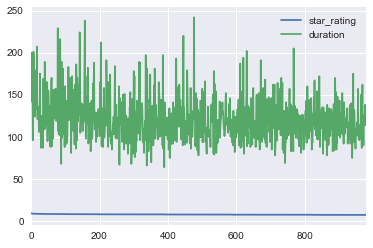

In [13]:
# getting an initial sense of the numeric data on a plot, before developing something more specific
movies.plot()

In [14]:
#sorting the data to make plotting easier

my_cols =['duration','title']
movies[my_cols].sort_values('duration',ascending=False)

,duration,title
476,242,Hamlet
157,238,Gone with the Wind
78,229,Once Upon a Time in America
142,224,Lagaan: Once Upon a Time in India
445,220,The Ten Commandments
85,216,Lawrence of Arabia
204,212,Ben-Hur
17,207,Seven Samurai
767,205,"It's a Mad, Mad, Mad, Mad World"
630,202,Malcolm X


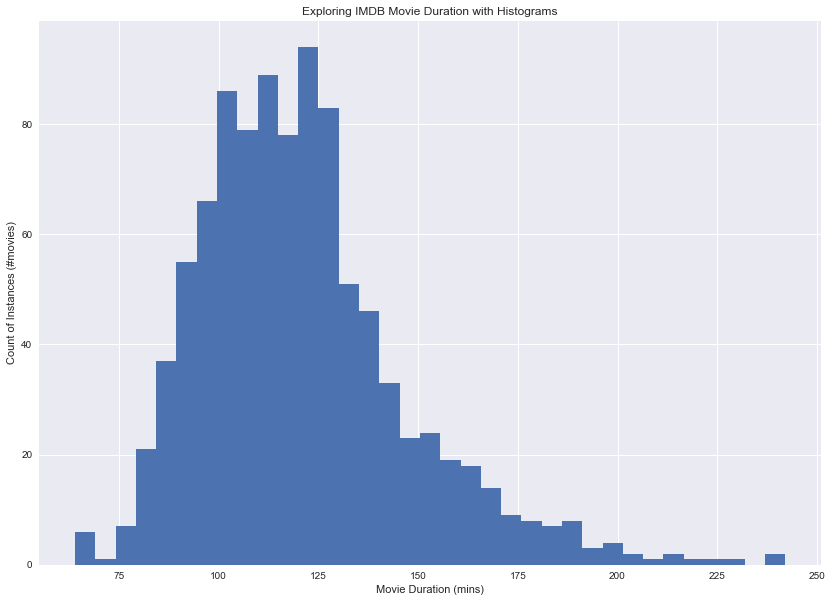

In [16]:
plt.subplots(figsize=(14,10))

sns.set()
plt.hist(movies['duration'],bins=35) #opted for 35 based on trial and error

plt.xlabel('Movie Duration (mins)')
plt.ylabel('Count of Instances (#movies)')
plt.title('Exploring IMDB Movie Duration with Histograms')
plt.show()

#### Use a box plot to display that same data.

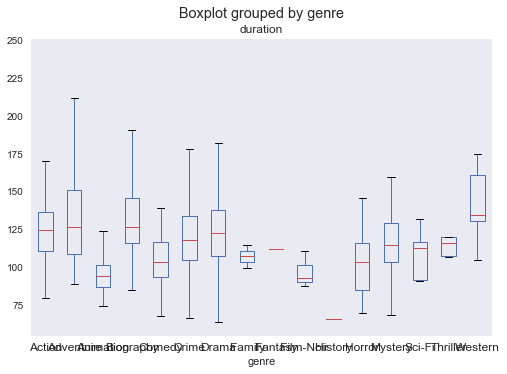

In [17]:
# starting with a pandas boxplot. it works, but it's a pretty poor attempt at conveying 
# useful information, so I'll build it up from here. Firstly, by going back to basics and 
# then increasing the size and fidelity of this genre based boxplot

movies.boxplot(by='genre', 
                       column=['duration'], 
                       grid=False)

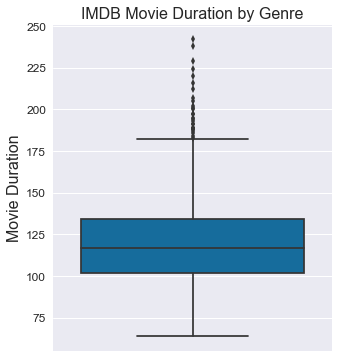

In [18]:
#testing a single boxplot to determine IQR for duration across all movies

plt.subplots(figsize=(5,6))

bplot = sns.boxplot(y='duration', 
                 data=movies, 
                 width=0.8,
                 palette="colorblind")

bplot.axes.set_title("IMDB Movie Duration by Genre",
                    fontsize=16)
 
bplot.set_ylabel("Movie Duration",
                fontsize=16)
 
bplot.tick_params(labelsize=12)

Whilst the boxplot is conveying information that was contained in the .describe() above, it's becoming 
easier to determine the distribution of the sample through visual means

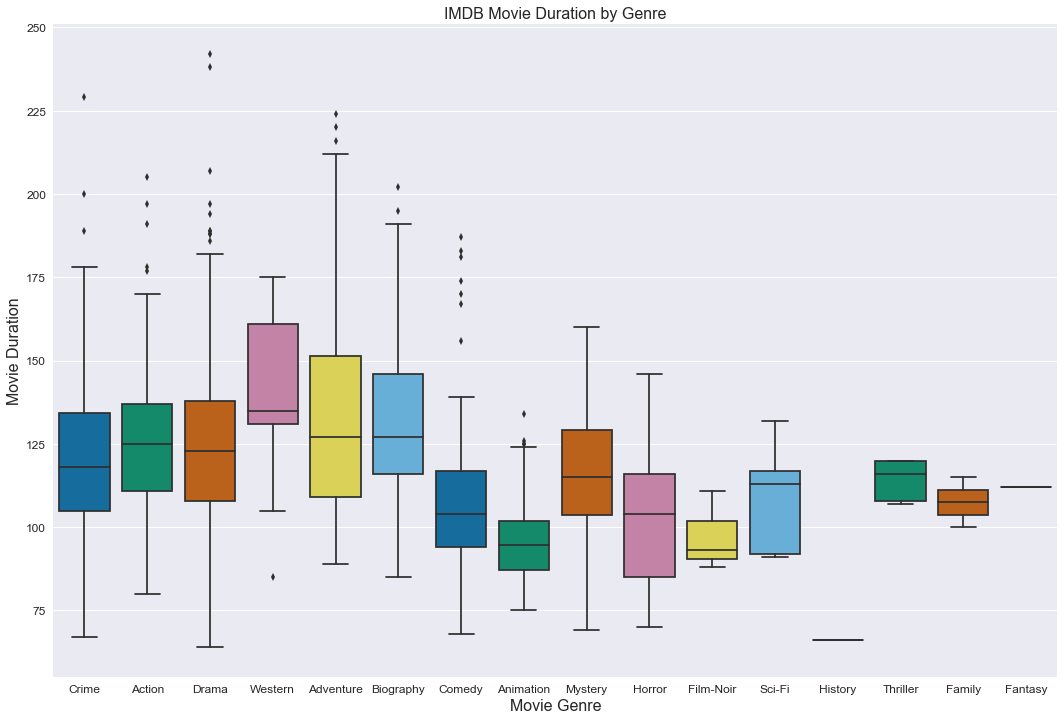

In [19]:
plt.subplots(figsize=(18,12))

bplot = sns.boxplot(y='duration', x='genre', 
                 data=movies, 
                 width=0.8,
                 palette="colorblind")

bplot.axes.set_title("IMDB Movie Duration by Genre",
                    fontsize=16)
 
bplot.set_xlabel("Movie Genre", 
                fontsize=16)
 
bplot.set_ylabel("Movie Duration",
                fontsize=16)
 
bplot.tick_params(labelsize=12)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [20]:
gby = movies.groupby('content_rating').count()
gby

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


taking a first look at these content rating categories, there's a number of 'noisy' but similar looking 
categories, such as 'unrated' and 'not rated'. Some data clean up will help get to the decisions needed

#### Use a visualisation to display that same data, including a title and axis labels.

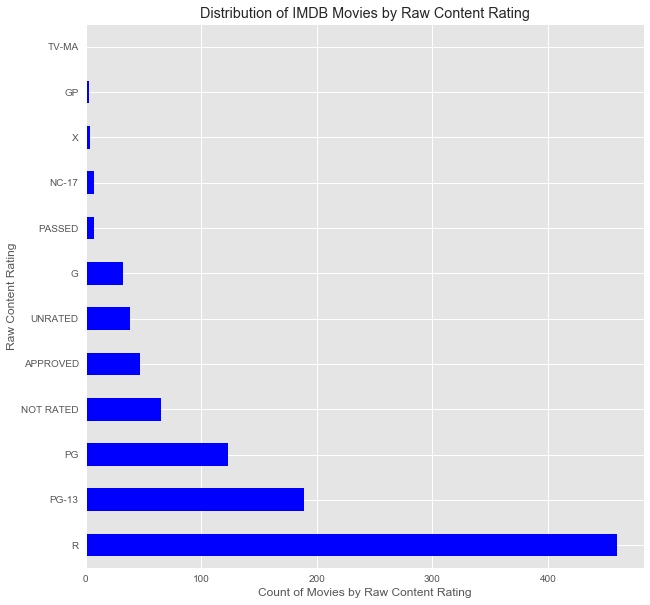

In [21]:
plt.style.use("ggplot") 
#i've jumped over to gg-plot style visualisation to ease the colour changing

fig, ax = plt.subplots(figsize=(10, 10))

movies["content_rating"].value_counts().plot(kind="barh",colormap='winter')

plt.xlabel('Count of Movies by Raw Content Rating')
plt.ylabel('Raw Content Rating')
plt.title('Distribution of IMDB Movies by Raw Content Rating')
plt.show()

In [54]:
# There's a predominance of R-rated movies. I don't know how this compares to the total of all 
# movies released, but it makes basic sense

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [23]:
# my original plan involved set and resetting the index to prevent data loss. too complicated!
movies2 = pd.read_csv('data/imdb_1000.csv')
movies2.replace ({'NOT RATED':'UNRATED' , 'NOT_RATED':'UNRATED' , 'APPROVED':'UNRATED' , 'PASSED':'UNRATED' , 'GP':'UNRATED'},inplace=True)
movies2

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [24]:
#checking all has worked as intended. had to include 2 x versions of NOT RATED and NOT_RATED
gby2 = movies2.groupby('content_rating').count()
gby2

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
G,32,32,32,32,32
NC-17,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460
TV-MA,1,1,1,1,1
UNRATED,160,160,160,160,160
X,4,4,4,4,4


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [25]:
movies2.replace ({'X':'NC-17' , 'TV-MA':'NC-17'},inplace=True)
movies2

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [26]:
#re-checking all has worked as intended with the second round of df.replace. in 
#retrospect, both phases of de.replace could have been done in a single step
gby2 = movies2.groupby('content_rating').count()
gby2

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
G,32,32,32,32,32
NC-17,12,12,12,12,12
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460
UNRATED,160,160,160,160,160


#### Count the number of missing values in each column.

In [27]:
movies2.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

Given this is a categorical data type, rather than exploring distribution, mean/mode it seems more appropriate to identify a particular category. Of the 6 remaining categories, 'unrated' is the equivalent of NaN, so I'll replace the nulls with 'UNRATED'

In [28]:
movies2['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [29]:
movies2['content_rating'].fillna(value='UNRATED', inplace=True) 
#i've limited fillna to the column. seems like good 
#practise to be sparing with potentially powerful global functions such as this

In [30]:
movies2.isnull().sum() #seems to have worked. no more null values present in the sample

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [31]:
movies2['content_rating'].value_counts() #i can see my 'UNRATED' values have gone from 160 to 163

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [78]:
#first I want to create additional columns. i'd originally done it twice, until i realised it was un-necessary duplication to 
#create new columns for both >2 and <2 

movies2['duration>2'] = movies2.apply(lambda row: row["duration"] >120, axis=1) 
movies2.head()

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True,False
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",True,False
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",True,False
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",True,False
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",True,False


In [33]:
gby3 = movies2.groupby('duration>2').count()
gby3

,star_rating,title,content_rating,genre,duration,actors_list
duration>2,,,,,,
False,543,543,543,543,543,543
True,436,436,436,436,436,436


In [34]:
mean = movies2.groupby('duration>2').mean()
print (mean)

            star_rating    duration
duration>2                         
False           7.83849  102.988950
True            7.95367  143.385321


#### Use a visualisation to detect whether there is a relationship between duration and star rating.

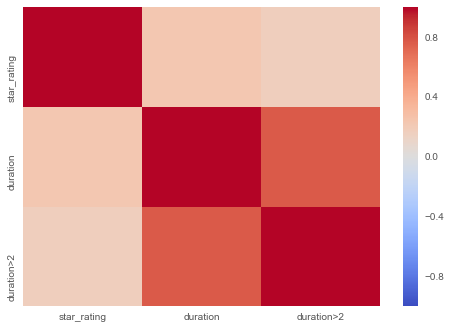

In [36]:
#first try - at a headline level it looks like there's at least some weak correlation

sns.heatmap(movies2.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm");

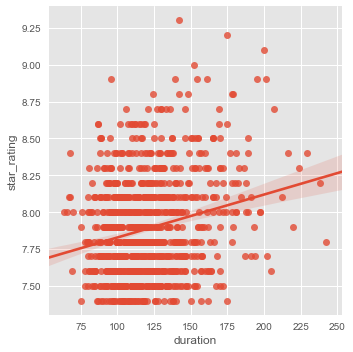

In [37]:
sns.lmplot("duration", "star_rating", movies2);
#there's some evidence of correlation, but I want to be more specific. i'll use a correlation matrix and heatmap

In [38]:
#let's be more specific and look for a p value. null hypothesis that there is not a relationship
corr, p_value = stats.pearsonr(movies2["duration"], movies2["star_rating"])
print(corr, p_value)

0.227149183431 6.36595567745e-13


weak but positive correlation is in evidence (0.22). The p value is not significant enough to reject the null hypothesis (6.36e-13)

#### Calculate the average duration for each genre.

In [39]:
mean2 = movies2.groupby('genre').mean()
print (mean2.duration)

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64


## Advanced level

#### Visualise the relationship between content rating and duration.

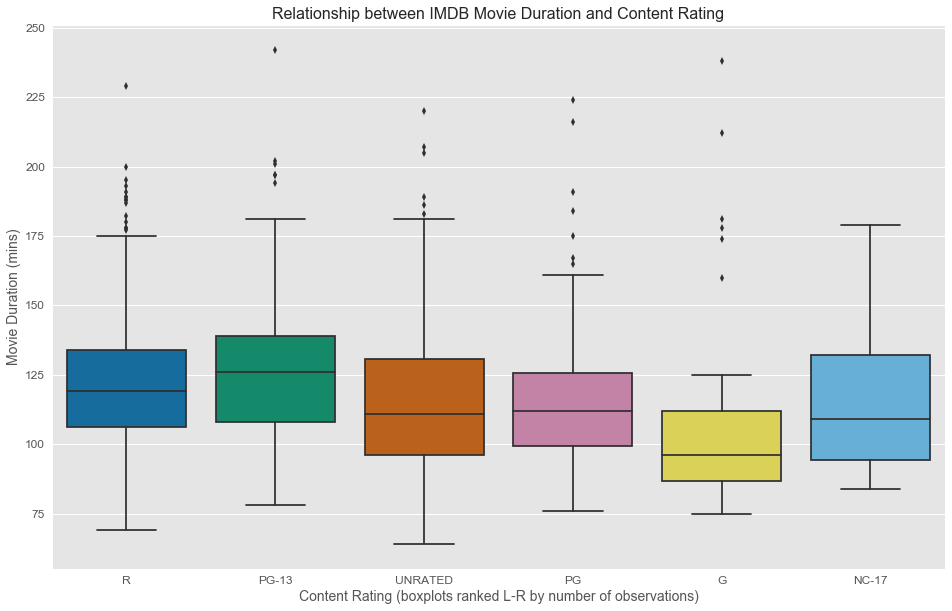

In [40]:
plt.subplots(figsize=(16,10))

bplot = sns.boxplot(y='duration', x='content_rating', 
                 data=movies2, 
                 width=0.8,
                 palette="colorblind")

bplot.axes.set_title("Relationship between IMDB Movie Duration and Content Rating",
                    fontsize=16)
 
bplot.set_xlabel("Content Rating (boxplots ranked L-R by number of observations)", 
                fontsize=14)
 
bplot.set_ylabel("Movie Duration (mins)",
                fontsize=14)
 
bplot.tick_params(labelsize=12)

In [41]:
movies2.head()

,star_rating,title,content_rating,genre,duration,actors_list,duration>2
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",True
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",True
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",True
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",True


In [42]:
movies2.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
duration>2           bool
dtype: object

#### Determine the top rated movie (by star rating) for each genre.

In [43]:
max1 = movies2.groupby('genre').max()
max1.title

genre
Action                                   Yojimbo
Adventure                              True Grit
Animation                         Wreck-It Ralph
Biography                          Walk the Line
Comedy                                Zombieland
Crime                                     Zodiac
Drama                                       Zulu
Family       Willy Wonka & the Chocolate Factory
Fantasy                The City of Lost Children
Film-Noir                          The Third Man
History                      Battleship Potemkin
Horror                                     [Rec]
Mystery                                  Vertigo
Sci-Fi             The Day the Earth Stood Still
Thriller               The Man Who Knew Too Much
Western                               Unforgiven
Name: title, dtype: object

In [44]:
#double checking that the .max() is bringing back the top title
max1

,star_rating,title,content_rating,duration,actors_list,duration>2
genre,,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L...",True
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va...",True
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb...",True
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi...",True
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ...",True
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K...",True
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich...",True
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C...",False
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ...",False


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [61]:
movies2 ['is_duplicate'] = movies2.duplicated (['title'])
movies2

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True,False
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",True,False
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",True,False
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",True,False
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",True,False
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",False,False
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",True,False
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",True,False
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",True,False
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",True,False


In [62]:
movies2 ['is_duplicate'].sum() #trying to figure out how big of a duplicate problem I have to deal with

4

In [63]:
movies3 = movies2.loc [movies2['is_duplicate']==True]
movies3

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",True,True
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",True,True
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",True,True
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True,True


In [74]:
movies2.loc [movies2['title']=='Dracula'] #these aren't duplicate data, they're remakes!

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",False,False
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",True,True


In [77]:
movies2.loc [movies2['title']=='The Girl with the Dragon Tattoo'] #these aren't duplicate data, they're remakes!

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",True,False
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",True,True


In [76]:
movies2.loc [movies2['title']=='Les Miserables'] #these aren't duplicate data, they're remakes!

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",True,False
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",True,True


In [75]:
movies2.loc [movies2['title']=='True Grit'] #these aren't duplicate data, they're remakes!

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",False,False
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True,True


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [103]:
star1 = movies2.groupby(['genre']).count()
star1 #eyeballing the data

,star_rating,title,content_rating,duration,actors_list,duration>2,is_duplicate
genre,,,,,,,
Action,136,136,136,136,136,136,136
Adventure,75,75,75,75,75,75,75
Animation,62,62,62,62,62,62,62
Biography,77,77,77,77,77,77,77
Comedy,156,156,156,156,156,156,156
Crime,124,124,124,124,124,124,124
Drama,278,278,278,278,278,278,278
Family,2,2,2,2,2,2,2
Fantasy,1,1,1,1,1,1,1


In [112]:
%%time
star2 = movies2.groupby(['genre']).filter(lambda x: len(x) >= 10)
star2 #filtering the list such that only genres with 10 movies in are returned

CPU times: user 8.6 ms, sys: 3.27 ms, total: 11.9 ms
Wall time: 10.8 ms


In [105]:
star3 = star2.groupby(['genre']).count()
star3 #checking my lambda function is working

,star_rating,title,content_rating,duration,actors_list,duration>2,is_duplicate
genre,,,,,,,
Action,136,136,136,136,136,136,136
Adventure,75,75,75,75,75,75,75
Animation,62,62,62,62,62,62,62
Biography,77,77,77,77,77,77,77
Comedy,156,156,156,156,156,156,156
Crime,124,124,124,124,124,124,124
Drama,278,278,278,278,278,278,278
Horror,29,29,29,29,29,29,29
Mystery,16,16,16,16,16,16,16


In [114]:
%%time
mean5 = star2.groupby('genre').mean() #where star2 is my df slice containing only genres containing over 10 films
print (mean5.star_rating)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64
CPU times: user 7.95 ms, sys: 2.84 ms, total: 10.8 ms
Wall time: 8.66 ms


In [115]:
median1 = star2.groupby('genre').median() #where star2 is my df slice containing only genres containing over 10 films
print (median1.star_rating) #interesting...the horror genre is improved by the use of the median. don't want to 
#over-generalise a pattern given there's only 29 observations for horror

genre
Action       7.8
Adventure    7.9
Animation    7.9
Biography    7.8
Comedy       7.8
Crime        7.8
Drama        7.9
Horror       7.7
Mystery      8.1
Name: star_rating, dtype: float64


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [144]:
vc1 = movies2['genre'].value_counts()
vc1

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [174]:
vc2 = vc1.loc[vc1.index.isin(['Drama','Comedy','Crime','Biography','Adventure','Animation','Horror','Mystery'])].reset_index()
vc2 #i've interpreted these options as ways of exploring the data, rather than repeating the mean/median

,index,genre
0,Drama,278
1,Comedy,156
2,Crime,124
3,Biography,77
4,Adventure,75
5,Animation,62
6,Horror,29
7,Mystery,16


i could merge the series above back to the initial dataframe, but now I know the genres with over 10 movies, I can 
use that information to generate a mean or median on the primary dataset (movies2)

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [198]:
mean6 = movies2.groupby('genre').mean() #back to my full list, movies2
print (mean6.star_rating)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64


In [207]:
mean7 = movies2.loc[movies2['genre'].isin(['Drama','Comedy','Crime','Biography','Adventure','Animation','Horror','Mystery'])],
['star_rating','title']
mean7

(     star_rating                                              title  \
 0            9.3                           The Shawshank Redemption   
 1            9.2                                      The Godfather   
 2            9.1                             The Godfather: Part II   
 4            8.9                                       Pulp Fiction   
 5            8.9                                       12 Angry Men   
 7            8.9      The Lord of the Rings: The Return of the King   
 8            8.9                                   Schindler's List   
 9            8.9                                         Fight Club   
 10           8.8  The Lord of the Rings: The Fellowship of the Ring   
 13           8.8                                       Forrest Gump   
 14           8.8              The Lord of the Rings: The Two Towers   
 15           8.7                                       Interstellar   
 16           8.7                    One Flew Over the Cuckoo's 

#### Option 4: aggregate by count and mean, then filter using the count

In [210]:
movies2.columns #grabbing column headers

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list', 'duration>2', 'is_duplicate'],
      dtype='object')

In [240]:
#aggregating by count and mean
s9 = movies2[['star_rating','title','content_rating','genre','duration']].groupby(['genre']).agg(['mean', 'count'])
s9

star_rating          duration      
                 mean count        mean count
genre                                        
Action       7.884559   136  126.485294   136
Adventure    7.933333    75  134.840000    75
Animation    7.914516    62   96.596774    62
Biography    7.862338    77  131.844156    77
Comedy       7.822436   156  107.602564   156
Crime        7.916935   124  122.298387   124
Drama        7.902518   278  126.539568   278
Family       7.850000     2  107.500000     2
Fantasy      7.700000     1  112.000000     1
Film-Noir    8.033333     3   97.333333     3
History      8.000000     1   66.000000     1
Horror       7.806897    29  102.517241    29
Mystery      7.975000    16  115.625000    16
Sci-Fi       7.920000     5  109.000000     5
Thriller     7.680000     5  114.200000     5
Western      8.255556     9  136.666667     9

In [376]:
#filtering using the count
s9[s9[('star_rating', 'count')] > 10]

star_rating          duration      
                 mean count        mean count
genre                                        
Action       7.884559   136  126.485294   136
Adventure    7.933333    75  134.840000    75
Animation    7.914516    62   96.596774    62
Biography    7.862338    77  131.844156    77
Comedy       7.822436   156  107.602564   156
Crime        7.916935   124  122.298387   124
Drama        7.902518   278  126.539568   278
Horror       7.806897    29  102.517241    29
Mystery      7.975000    16  115.625000    16

In [371]:
#my original approach, which was to transform the multi-index into a set of columns
new_col_name = [' '.join(col).strip() for col in s9.columns.values]

In [373]:
#and then to turn the columns into a dataframe, making for easier df operations
new_df = pd.DataFrame(s9.values, columns=new_col_name, index=list(s9.index))
new_df[new_df['star_rating count'] >10]

,star_rating mean,star_rating count,duration mean,duration count
Action,7.884559,136.0,126.485294,136.0
Adventure,7.933333,75.0,134.840000,75.0
Animation,7.914516,62.0,96.596774,62.0
Biography,7.862338,77.0,131.844156,77.0
Comedy,7.822436,156.0,107.602564,156.0
Crime,7.916935,124.0,122.298387,124.0
Drama,7.902518,278.0,126.539568,278.0
Horror,7.806897,29.0,102.517241,29.0
Mystery,7.975000,16.0,115.625000,16.0


## Bonus

#### If you were to make a recommendation to a film studio about a new movie they're working on:

- who would you recommend casting?
- what content rating, genre, and duration would you recommend they target?

**Apologies - I've timed out on this part of it :( **

On the assumption that the target variable we should maximise for is the 'star_rating' column, i've assumed the movie studio would want a movie to land in the upper quartile


In [421]:
movies2.star_rating.quantile([0.25])
#anything above a rating of 7.6 would land a movie in the upper quartile

0.25    7.6
Name: star_rating, dtype: float64

In [422]:
movies3 = movies2[movies2[('star_rating')] > 7.6]
movies3

,star_rating,title,content_rating,genre,duration,actors_list,duration>2,is_duplicate,lead_actors
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",True,False,"[[u'Tim Robbins', u'Morgan Freeman', u'Bob G..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",True,False,"[[u'Marlon Brando', u'Al Pacino', u'James Ca..."
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",True,False,"[[u'Al Pacino', u'Robert De Niro', u'Robert ..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",True,False,"[[u'Christian Bale', u'Heath Ledger', u'Aaro..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",True,False,"[[u'John Travolta', u'Uma Thurman', u'Samuel..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",False,False,"[[u'Henry Fonda', u'Lee J. Cobb', u'Martin B..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",True,False,"[[u'Clint Eastwood', u'Eli Wallach', u'Lee V..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",True,False,"[[u'Elijah Wood', u'Viggo Mortensen', u'Ian ..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",True,False,"[[u'Liam Neeson', u'Ralph Fiennes', u'Ben Ki..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh...",True,False,"[[u'Brad Pitt', u'Edward Norton', u'Helena B..."


In [408]:
movies3 = movies2['lead_actors'] = movies2['actors_list'].str.split(',')

In [409]:
movies3.head()

0    [[u'Tim Robbins',  u'Morgan Freeman',  u'Bob G...
1    [[u'Marlon Brando',  u'Al Pacino',  u'James Ca...
2    [[u'Al Pacino',  u'Robert De Niro',  u'Robert ...
3    [[u'Christian Bale',  u'Heath Ledger',  u'Aaro...
4    [[u'John Travolta',  u'Uma Thurman',  u'Samuel...
Name: actors_list, dtype: object

In [415]:
movies3.describe

<bound method NDFrame.describe of 0      [[u'Tim Robbins',  u'Morgan Freeman',  u'Bob G...
1      [[u'Marlon Brando',  u'Al Pacino',  u'James Ca...
2      [[u'Al Pacino',  u'Robert De Niro',  u'Robert ...
3      [[u'Christian Bale',  u'Heath Ledger',  u'Aaro...
4      [[u'John Travolta',  u'Uma Thurman',  u'Samuel...
5      [[u'Henry Fonda',  u'Lee J. Cobb',  u'Martin B...
6      [[u'Clint Eastwood',  u'Eli Wallach',  u'Lee V...
7      [[u'Elijah Wood',  u'Viggo Mortensen',  u'Ian ...
8      [[u'Liam Neeson',  u'Ralph Fiennes',  u'Ben Ki...
9      [[u'Brad Pitt',  u'Edward Norton',  u'Helena B...
10     [[u'Elijah Wood',  u'Ian McKellen',  u'Orlando...
11     [[u'Leonardo DiCaprio',  u'Joseph Gordon-Levit...
12     [[u'Mark Hamill',  u'Harrison Ford',  u'Carrie...
13     [[u'Tom Hanks',  u'Robin Wright',  u'Gary Sini...
14     [[u'Elijah Wood',  u'Ian McKellen',  u'Viggo M...
15     [[u'Matthew McConaughey',  u'Anne Hathaway',  ...
16     [[u'Jack Nicholson',  u'Louise Fletcher',  u'M.